# Load Data weightLogInfo

In [5]:
weightLogInfo = 'C:/Users/Lenovo/Downloads/fitbit dataset/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv'
import pandas as pd
df_weightLogInfo = pd.read_csv(weightLogInfo)

# Cek .info()

In [5]:
df_weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


### Drop column 'Fat' karena hanya terdiri dari 2 data non-null

In [9]:
df_weightLogInfo.drop(['Fat'], axis=1, inplace=True)
df_weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   BMI             67 non-null     float64
 5   IsManualReport  67 non-null     bool   
 6   LogId           67 non-null     int64  
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 3.3+ KB


# Cek .describe()

In [13]:
df_weightLogInfo.describe()

,Id,WeightKg,WeightPounds,BMI,LogId
count,6.700000e+01,67.000000,67.000000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,47.540001,1.463098e+12


# Handle missing value

In [66]:
df_weightLogInfo.isnull().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
dtype: int64

# Handle duplicated row

In [40]:
df_weightLogInfo.duplicated().sum()

0

# Cek data distribution using KDE plot and boxplot

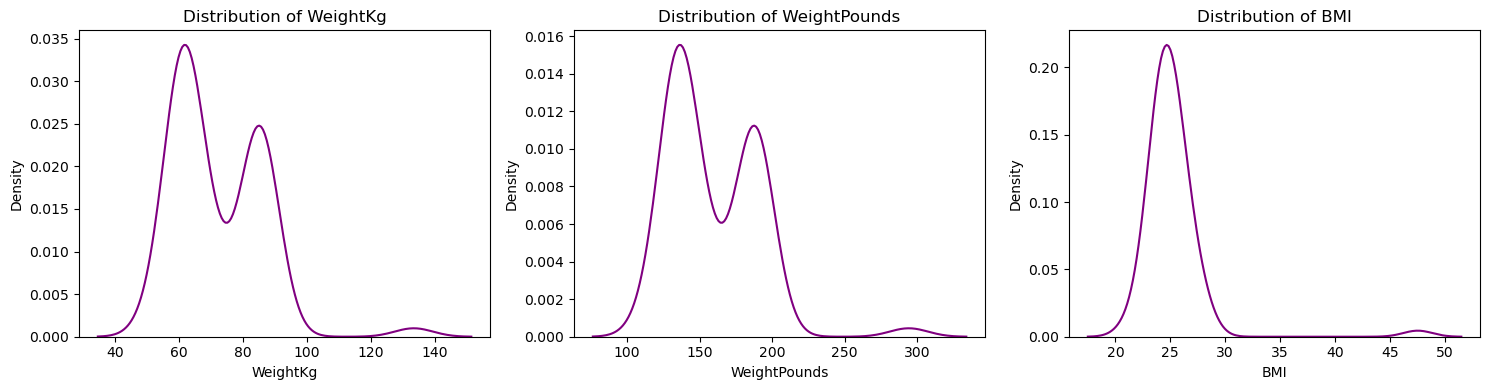

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns
col = df_weightLogInfo[['WeightKg', 'WeightPounds', 'BMI']]
col = col.columns

plt.figure(figsize=(15,4))
for i in range(len(col)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(x=df_weightLogInfo[col[i]], color='purple')
    plt.xlabel(col[i])
    plt.title(f'Distribution of {col[i]}')
    plt.tight_layout()

plt.show()


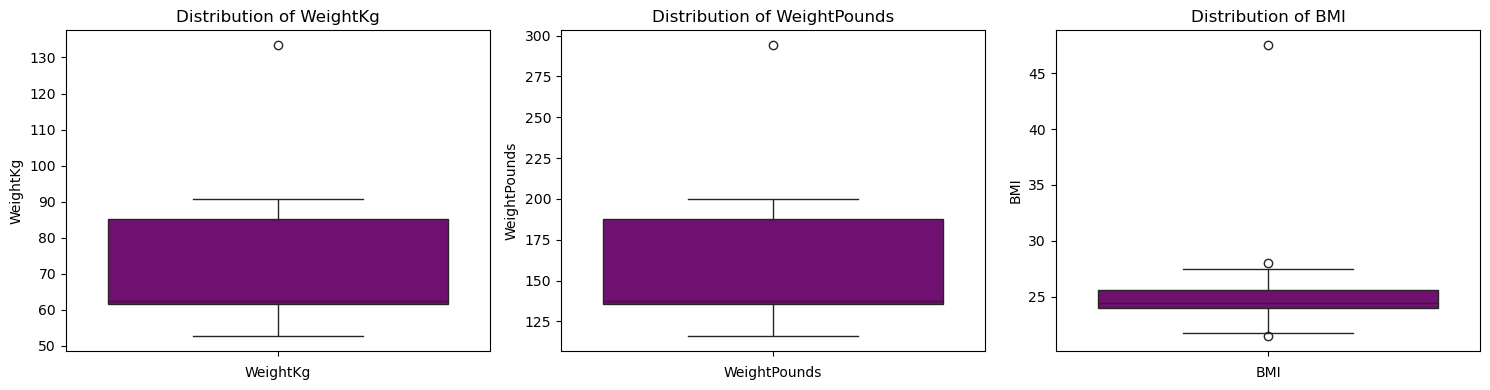

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 4))  
for i in range(len(col)):
    plt.subplot(1, 3, i+1)  
    sns.boxplot(y=df_weightLogInfo[col[i]],  color='purple') 
    plt.xlabel(col[i])
    plt.title(f'Distribution of {col[i]}')
    plt.tight_layout()

plt.show()

In [17]:
df_weightLogInfo_copy= df_weightLogInfo.copy()

In [19]:
import numpy as np
ch column in the list 'col'
for column in col:
    min_positive = df_weightLogInfo_copy.loc[df_weightLogInfo_copy[column] > 0, column].min() / 2
        mask = df_weightLogInfo_copy[column] > 0
        df_weightLogInfo_copy.loc[mask, column] = np.log(df_weightLogInfo_copy.loc[mask, column] + min_positive)


In [23]:
from scipy import stats
from scipy.stats import zscore
for c in col:
    z_scores = np.abs(stats.zscore(df_weightLogInfo_copy[c]))
    df_weightLogInfo_copy= df_weightLogInfo_copy[(z_scores <= 3)&(z_scores >= -3)]

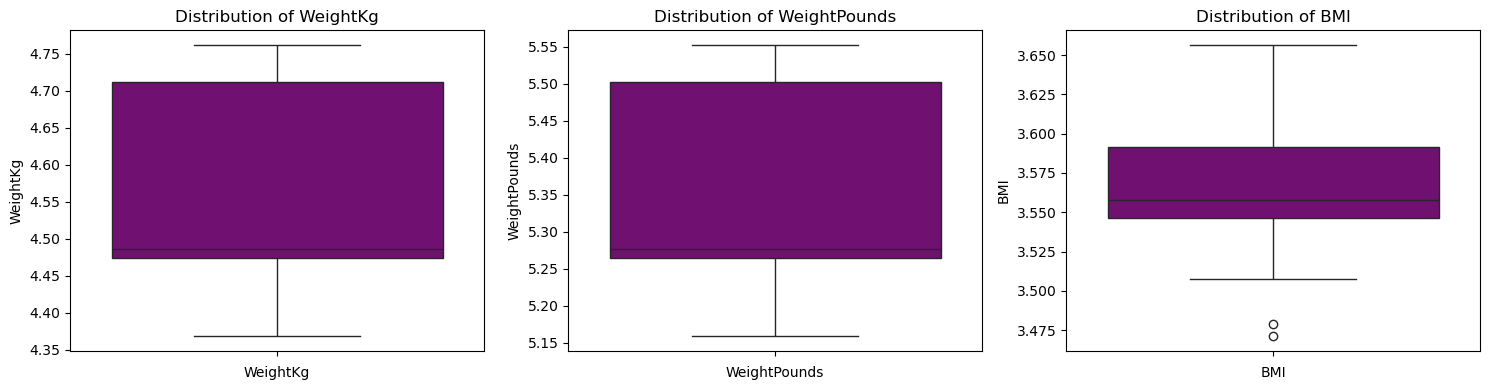

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 4))  
for i in range(len(col)):
    plt.subplot(1, 3, i+1)  
    sns.boxplot(y=df_weightLogInfo_copy[col[i]],  color='purple') 
    plt.xlabel(col[i])
    plt.title(f'Distribution of {col[i]}')
    plt.tight_layout()

plt.show()

In [22]:
df_dailyActivity.groupby('Id')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum().reset_index()


,Id,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,1200,594,6818,26293
1,1624580081,269,180,4758,38990
2,1644430081,287,641,5354,34856
3,1844505072,4,40,3579,37405
4,1927972279,41,24,1196,40840
5,2022484408,1125,600,7981,34490
6,2026352035,3,8,7956,21372
7,2320127002,42,80,6144,37823
8,2347167796,243,370,4545,12369
9,2873212765,437,190,9548,34013


In [6]:
total_minutes = df_dailyActivity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean().reset_index()
total_minutes.columns = ['ActivityStatus', 'AverageMinutes']
print(total_minutes)


         ActivityStatus  AverageMinutes
0     VeryActiveMinutes       21.164894
1   FairlyActiveMinutes       13.564894
2  LightlyActiveMinutes      192.812766
3      SedentaryMinutes      991.210638


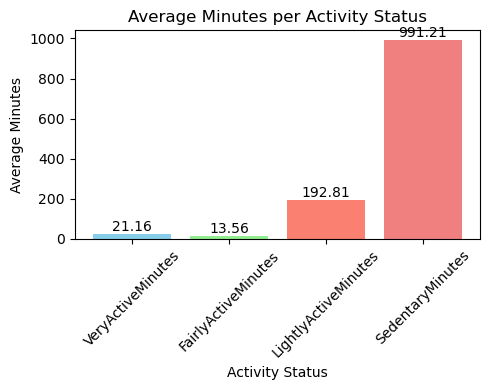

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'ActivityStatus': ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'],
    'AverageMinutes': [21.164894, 13.564894, 192.812766, 991.210638]
}

# Create DataFrame
df = pd.DataFrame(data)

# Colors for each bar
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral']

# Plot the bar chart
plt.figure(figsize=(5,4))
bars = plt.bar(df['ActivityStatus'], df['AverageMinutes'], color=colors)

# Add labels and title
plt.xlabel('Activity Status')
plt.ylabel('Average Minutes')
plt.title('Average Minutes per Activity Status')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insight

In [ ]:
# make a new column of hour 12h format extracted from 'ActivityHour'
df_hourlyCalories['HourPM/AM'] = df_hourlyCalories['ActivityHour'].apply(lambda x: x.split()[1] + ' ' + x.split()[2])

# make a new column of hour converting the time into 24 h format
df_hourlyCalories['Time_24_hour'] = pd.to_datetime(df_hourlyCalories['HourPM/AM'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

# make a hour column of HH format extracted from HH:MM:SS format
df_hourlyCalories['Hour'] = df_hourlyCalories['Time_24_hour'].apply(lambda x: x.split(':')[0])

df_hourlyCalories.head()

,Id,ActivityHour,Calories,HourPM/AM,Time_24_hour,Hour
0,1503960366,4/12/2016 12:00:00 AM,81,12:00:00 AM,00:00:00,00
1,1503960366,4/12/2016 1:00:00 AM,61,1:00:00 AM,01:00:00,01
2,1503960366,4/12/2016 2:00:00 AM,59,2:00:00 AM,02:00:00,02
3,1503960366,4/12/2016 3:00:00 AM,47,3:00:00 AM,03:00:00,03
4,1503960366,4/12/2016 4:00:00 AM,48,4:00:00 AM,04:00:00,04


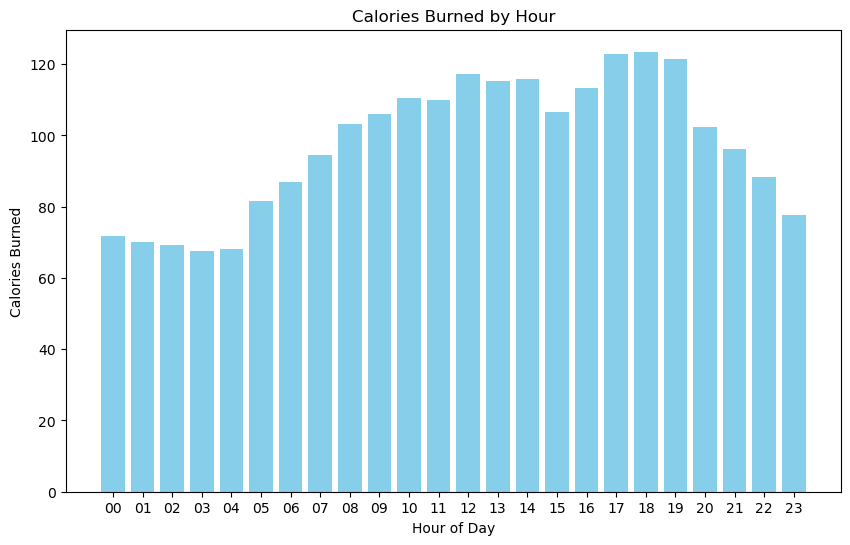

In [ ]:
import matplotlib.pyplot as plt
avg_calories = df_hourlyCalories.groupby('Hour')['Calories'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_calories['Hour'], avg_calories['Calories'], color='skyblue')

# Add titles and labels
plt.title('Calories Burned by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Calories Burned')

# Show plot
plt.show()


In [ ]:
minuteStepsNarrow = 'C:/Users/Lenovo/Downloads/fitbit dataset/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv'
df_minuteStepsNarrow = pd.read_csv(minuteStepsNarrow)

In [ ]:
# copy dtaset from df_minuteStepsNarrow
df_hourlyStep = df_minuteStepsNarrow.copy()

# make a new column of hour 12h format extracted from 'ActivityHour'
df_hourlyStep['Hour PM/AM'] = df_hourlyStep['ActivityMinute'].apply(lambda x: x.split()[1] + ' ' + x.split()[2] )

# make a new column of hour converting the time into 24 h format
df_hourlyStep['Time_24_hour'] = pd.to_datetime(df_hourlyStep['Hour PM/AM'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

# make a hour column of HH format extracted from HH:MM:SS format
df_hourlyStep['Hour'] = df_hourlyStep['Time_24_hour'].apply(lambda x: x.split(':')[0])
print(df_hourlyStep.sample(10))

                 Id         ActivityMinute  Steps   Hour PM/AM Time_24_hour  \
43988    1624580081   4/12/2016 4:08:00 PM      0   4:08:00 PM     16:08:00   
923936   6775888955   4/12/2016 4:56:00 AM      0   4:56:00 AM     04:56:00   
967911   6962181067   4/17/2016 7:51:00 AM      0   7:51:00 AM     07:51:00   
353792   2347167796   4/14/2016 2:32:00 PM     28   2:32:00 PM     14:32:00   
283054   2026352035   4/26/2016 6:34:00 PM      7   6:34:00 PM     18:34:00   
1005572  7007744171  4/12/2016 11:32:00 PM      0  11:32:00 PM     23:32:00   
758804   5553957443   4/12/2016 3:44:00 PM      0   3:44:00 PM     15:44:00   
1183747  8378563200    5/2/2016 1:07:00 PM      0   1:07:00 PM     13:07:00   
1226388  8583815059    5/1/2016 2:48:00 PM      0   2:48:00 PM     14:48:00   
74828    1624580081    5/4/2016 2:08:00 AM      0   2:08:00 AM     02:08:00   

        Hour  
43988     16  
923936    04  
967911    07  
353792    14  
283054    18  
1005572   23  
758804    15  
1183747   

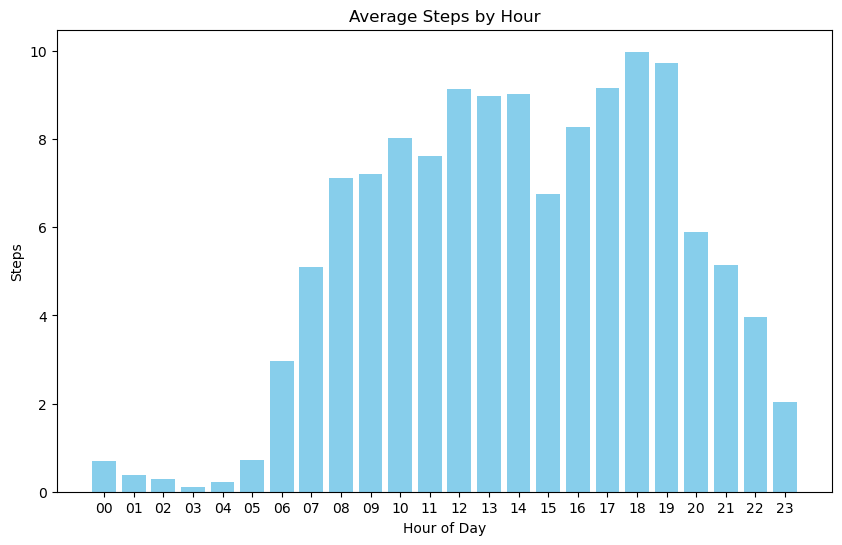

In [ ]:
import matplotlib.pyplot as plt
avg_steps = df_hourlyStep.groupby('Hour')['Steps'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.bar(avg_steps['Hour'], avg_steps['Steps'], color='skyblue')

# Add titles and labels
plt.title('Average Steps by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Steps')

# Show plot
plt.show()
